# Exploratory Data Analysis for SemEval 2026 Task 5

EDA on the JSON datasets:
- `train.json`
- `dev.json`
- `sample_data.json`

All code is designed to run on Kaggle with files located under `/kaggle/input/semeval-2026-task-5/`.


In [1]:
# 1. Imports
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mannwhitneyu, f_oneway

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# 2. Data loading helper and loading all splits
DATA_DIR = "/kaggle/input/semeval-2026-task-5"

def load_json_as_df(path, split_name):
    """Load a JSON file with top-level dict of records into a DataFrame.
    The top-level keys become (string) indices; each value is a row.
    """
    with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)
    df = pd.DataFrame.from_dict(data, orient="index")
    df["source_split"] = split_name
    return df

df_train = load_json_as_df(f"{DATA_DIR}/train.json", "train")
df_dev = load_json_as_df(f"{DATA_DIR}/dev.json", "dev")
df_sample = load_json_as_df(f"{DATA_DIR}/sample_data.json", "sample")

df = pd.concat([df_train, df_dev, df_sample], ignore_index=True)

df_train.shape, df_dev.shape, df_sample.shape, df.shape

((2280, 12), (588, 12), (30, 11), (2898, 12))

In [3]:
# 3. Quick overview of the data structure
print("Columns:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)

display(df.head())
display(df.sample(5, random_state=42))


Columns:
 ['homonym', 'judged_meaning', 'precontext', 'sentence', 'ending', 'choices', 'average', 'stdev', 'nonsensical', 'sample_id', 'example_sentence', 'source_split']

Data types:
 homonym              object
judged_meaning       object
precontext           object
sentence             object
ending               object
choices              object
average             float64
stdev               float64
nonsensical          object
sample_id            object
example_sentence     object
source_split         object
dtype: object


,homonym,judged_meaning,precontext,sentence,ending,choices,average,stdev,nonsensical,sample_id,example_sentence,source_split
0,potential,the difference in electrical charge between tw...,The old machine hummed in the corner of the wo...,The potential couldn't be measured.,She collected a battery reader and looked on e...,"[4, 5, 2, 3, 1]",3.0,1.581139,"[False, False, False, False, False]",1843,The circuit has a high potential difference.,train
1,potential,the inherent capacity for coming into being,The old machine hummed in the corner of the wo...,The potential couldn't be measured.,She collected a battery reader and looked on e...,"[5, 3, 4, 4, 3]",3.8,0.836660,"[False, False, False, False, False]",1844,The project has great potential for success.,train
2,potential,the difference in electrical charge between tw...,The old machine hummed in the corner of the wo...,The potential couldn't be measured.,The machine could make such wonderful clothing...,"[2, 1, 4, 3, 1]",2.2,1.303840,"[False, False, False, False, False]",1845,The circuit has a high potential difference.,train
3,potential,the inherent capacity for coming into being,The old machine hummed in the corner of the wo...,The potential couldn't be measured.,The machine could make such wonderful clothing...,"[4, 5, 5, 3, 5]",4.4,0.894427,"[False, False, False, False, False]",1846,The project has great potential for success.,train
4,potential,the difference in electrical charge between tw...,The old machine hummed in the corner of the wo...,The potential couldn't be measured.,,"[1, 1, 4, 4, 3]",2.6,1.516575,"[False, False, False, False, False]",1847,The circuit has a high potential difference.,train


,homonym,judged_meaning,precontext,sentence,ending,choices,average,stdev,nonsensical,sample_id,example_sentence,source_split
141,palms,any plant of the family Palmae having an unbra...,Jack and Emma arrived at the park early in the...,She took a photo of the palms.,They were green and such a beautiful scenery.,"[5, 5, 5, 5, 5]",5.0,0.000000,"[False, False, False, False, False]",3797,The tall palm swayed in the breeze.,train
1557,gravitated,move due to the pull of gravitation,Jack had always marveled at the wonders of the...,"As soon as he entered the room, he naturally g...","Before he knew it, Jack was right up on the di...","[1, 1, 2, 5, 2]",2.2,1.643168,"[False, False, False, False, False]",1600,Objects in space gravitate towards each other.,train
485,count,have faith or confidence in,Emily watched the stars twinkle in the night s...,She lost count of it all.,,"[1, 1, 1, 1, 5]",1.8,1.788854,"[False, False, False, False, False]",240,You can always count on her support.,train
1711,figures,one of the elements that collectively form a s...,"Emma was sitting by the window, watching the r...",She spent the afternoon sketching figures in h...,She dedicated an amount of time to creating sk...,"[2, 2, 2, 3, 3]",2.4,0.547723,"[False, False, False, False, False]",3014,The figure '3' represents a digit.,train
2248,steps,any maneuver made as part of progress toward a...,John had a big job interview in the city. He l...,He took all the steps he needed to get to wher...,,"[4, 4, 5, 5, 3]",4.2,0.836660,"[False, False, False, False, False]",2735,Each step brings us closer to success.,train


Missing values per column:
 sample_id           30
homonym              0
judged_meaning       0
precontext           0
sentence             0
ending               0
choices              0
average              0
stdev                0
nonsensical          0
example_sentence     0
source_split         0
dtype: int64


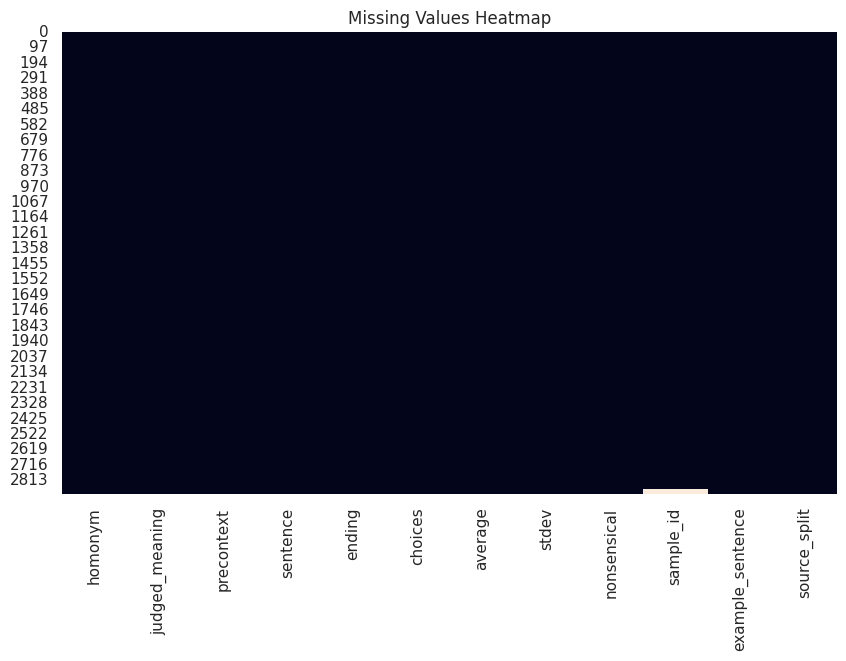

Number of duplicated rows (by sentence+ending): 2898


,homonym,judged_meaning,precontext,sentence,ending,choices,average,stdev,nonsensical,sample_id,example_sentence,source_split
1390,choppers,informal terms for a human 'tooth',"It was a bright, sunny day when John decided t...","""Wow, what huge choppers they are,"" said the m...",,"[1, 3, 3, 4, 4]",3.0,1.224745,"[False, False, False, False, False]",887,He showed off his new chopper.,train
1391,choppers,an aircraft without wings that obtains its lif...,"It was a bright, sunny day when John decided t...","""Wow, what huge choppers they are,"" said the m...",,"[1, 5, 2, 5, 3]",3.2,1.788854,"[False, False, False, False, False]",888,The chopper flew over the mountains.,train
1386,choppers,informal terms for a human 'tooth',"It was a bright, sunny day when John decided t...","""Wow, what huge choppers they are,"" said the m...",As he looked at his partner's new teeth as the...,"[5, 4, 4, 4, 5]",4.4,0.547723,"[False, False, False, False, True]",883,He showed off his new chopper.,train
1387,choppers,an aircraft without wings that obtains its lif...,"It was a bright, sunny day when John decided t...","""Wow, what huge choppers they are,"" said the m...",As he looked at his partner's new teeth as the...,"[1, 1, 1, 1, 1]",1.0,0.000000,"[False, False, True, False, False]",884,The chopper flew over the mountains.,train
1388,choppers,informal terms for a human 'tooth',"It was a bright, sunny day when John decided t...","""Wow, what huge choppers they are,"" said the m...","The clown replies, ""Yes, they are. I think tha...","[2, 3, 1, 3, 2]",2.2,0.836660,"[False, False, False, False, False]",885,He showed off his new chopper.,train


In [4]:
# 4. Missing values and duplicates

missing_counts = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_counts)

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# Duplicates based on the core text (sentence + ending)
duplicate_mask = df.duplicated(subset=["sentence", "ending"], keep=False)
print("Number of duplicated rows (by sentence+ending):", duplicate_mask.sum())
df_duplicates = df[duplicate_mask].sort_values(["sentence", "ending"])
df_duplicates.head()


The dataset naturally contains duplicated sentence–ending pairs, because each scenario is repeated once for each candidate meaning of the homonym. These are not accidental duplicates but reflect the multi-meaning structure of the task. Therefore, duplicates in (sentence, ending) should not be removed.

In [5]:
# 5. Feature engineering: text lengths and numeric summaries from lists

for col in ["precontext", "sentence", "ending"]:
    df[f"{col}_len"] = df[col].astype(str).apply(len)

# Choices: list of ratings
df["choices_min"] = df["choices"].apply(lambda x: min(x) if isinstance(x, list) and len(x) > 0 else np.nan)
df["choices_max"] = df["choices"].apply(lambda x: max(x) if isinstance(x, list) and len(x) > 0 else np.nan)
df["choices_mean"] = df["choices"].apply(lambda x: np.mean(x) if isinstance(x, list) and len(x) > 0 else np.nan)
df["choices_std"] = df["choices"].apply(lambda x: np.std(x, ddof=1) if isinstance(x, list) and len(x) > 1 else np.nan)

# Nonsensical: list of booleans
df["nonsensical_rate"] = df["nonsensical"].apply(
    lambda x: np.mean(x) if isinstance(x, list) and len(x) > 0 else np.nan
)

numeric_cols = [
    "average", "stdev",
    "precontext_len", "sentence_len", "ending_len",
    "choices_min", "choices_max", "choices_mean", "choices_std",
    "nonsensical_rate"
]

df[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
average,2898.0,3.137060,1.186577,1.0,2.200000,3.200000,4.200000,5.00000
stdev,2898.0,0.948792,0.519664,0.0,0.547723,0.894427,1.341641,2.19089
precontext_len,2898.0,180.836439,31.457454,97.0,157.000000,180.000000,201.000000,274.00000
sentence_len,2898.0,51.113872,21.632673,12.0,36.000000,48.000000,61.000000,212.00000
ending_len,2898.0,49.327812,42.496070,0.0,0.000000,52.000000,78.000000,245.00000
choices_min,2898.0,2.042788,1.280842,1.0,1.000000,1.000000,3.000000,5.00000
choices_max,2898.0,4.216011,1.131770,1.0,4.000000,5.000000,5.000000,5.00000
choices_mean,2898.0,3.137060,1.186577,1.0,2.200000,3.200000,4.200000,5.00000
choices_std,2898.0,0.948792,0.519664,0.0,0.547723,0.894427,1.341641,2.19089
nonsensical_rate,2898.0,0.021555,0.071099,0.0,0.000000,0.000000,0.000000,0.60000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


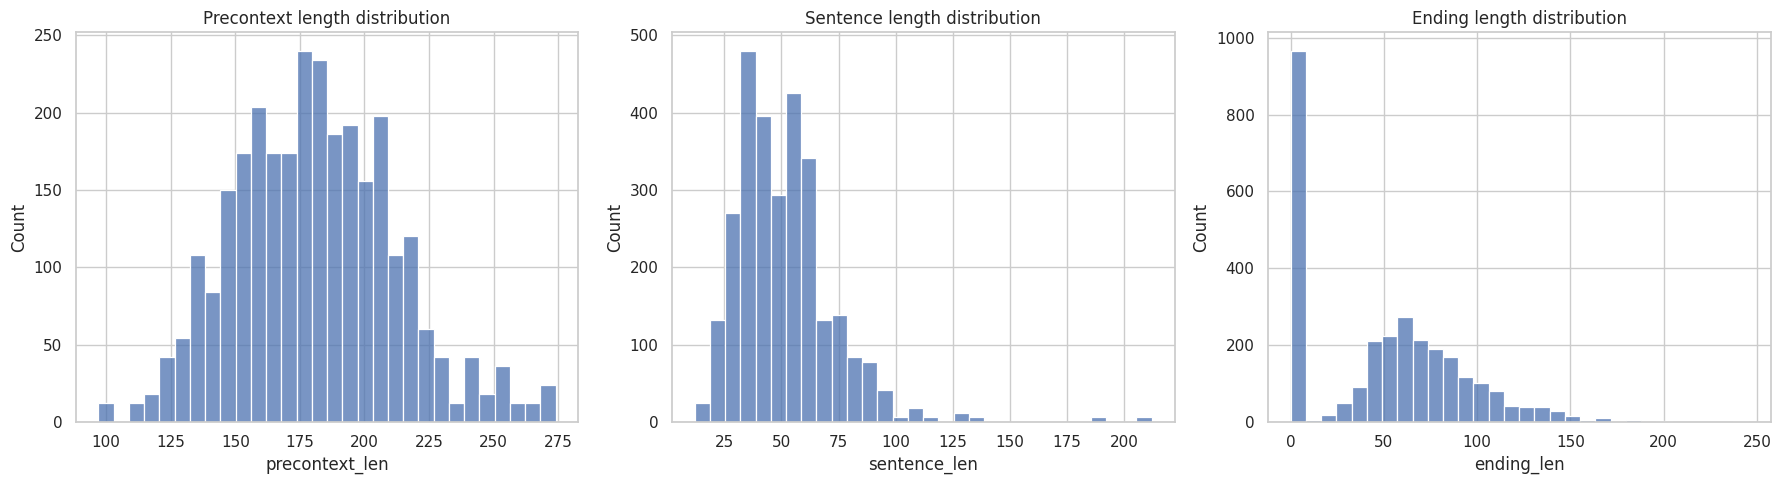

In [6]:
# 6. Univariate analysis: text length distributions

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df["precontext_len"], bins=30, ax=axes[0])
axes[0].set_title("Precontext length distribution")

sns.histplot(df["sentence_len"], bins=30, ax=axes[1])
axes[1].set_title("Sentence length distribution")

sns.histplot(df["ending_len"], bins=30, ax=axes[2])
axes[2].set_title("Ending length distribution")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


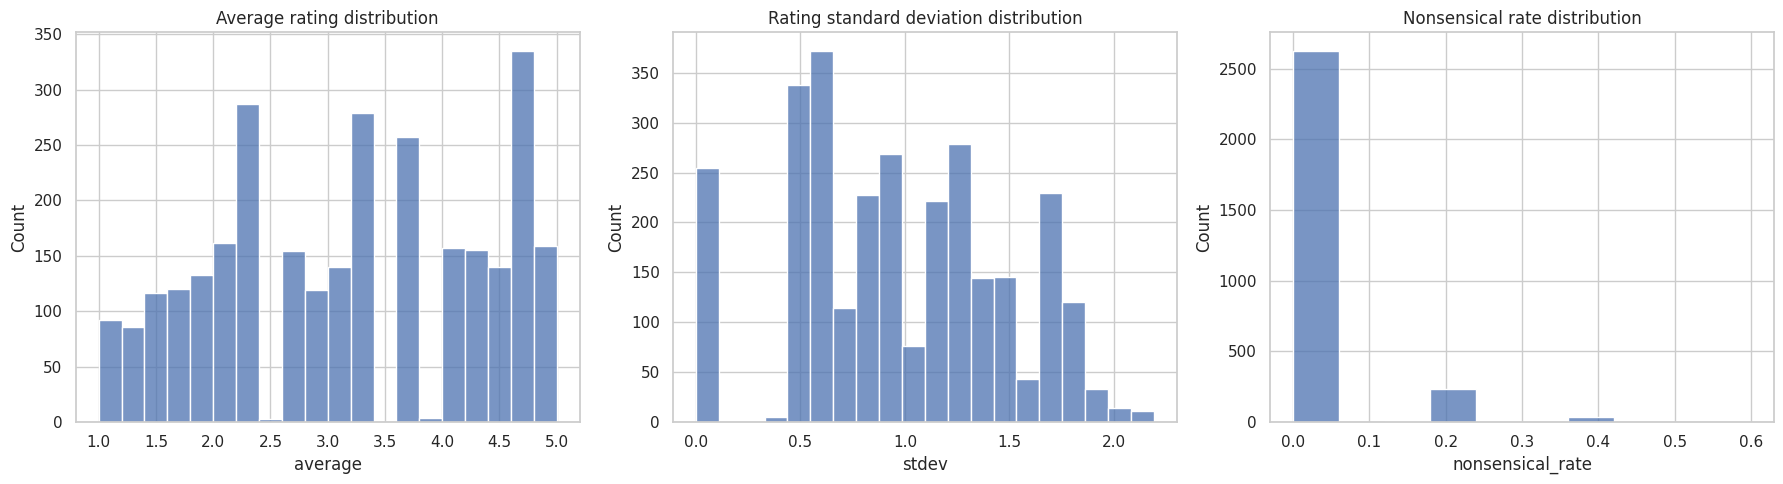

In [7]:
# 7. Univariate analysis: rating-related distributions

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["average"], bins=20, ax=axes[0])
axes[0].set_title("Average rating distribution")

sns.histplot(df["stdev"], bins=20, ax=axes[1])
axes[1].set_title("Rating standard deviation distribution")

sns.histplot(df["nonsensical_rate"], bins=10, ax=axes[2])
axes[2].set_title("Nonsensical rate distribution")

plt.tight_layout()
plt.show()


In [8]:
# 8. Split comparison: basic counts
df["source_split"].value_counts()


source_split
train     2280
dev        588
sample      30
Name: count, dtype: int64

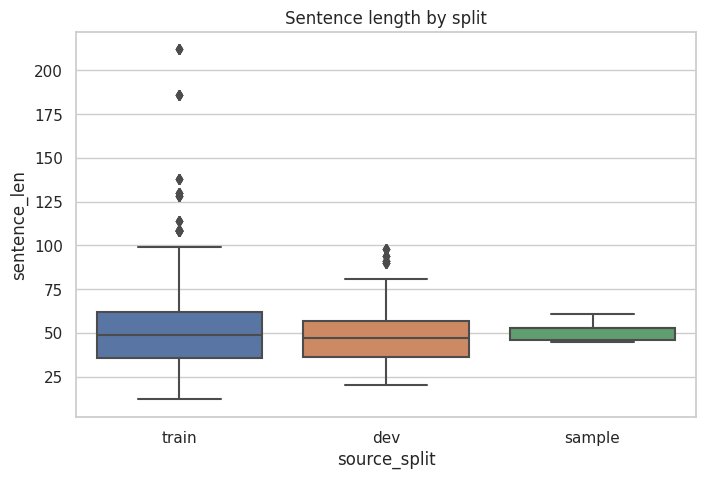

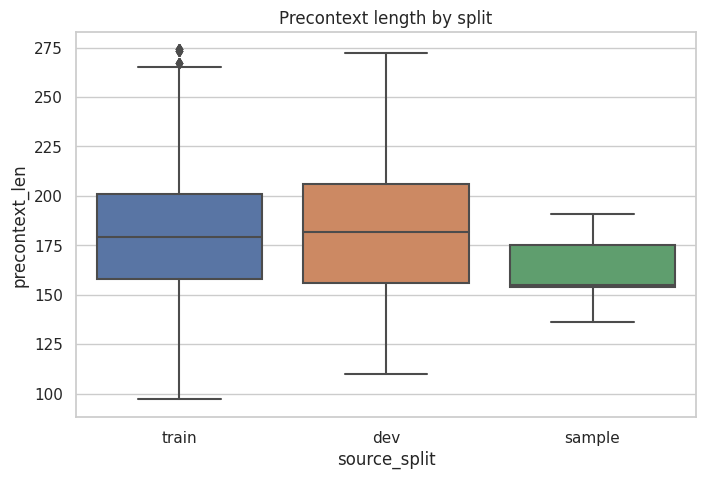

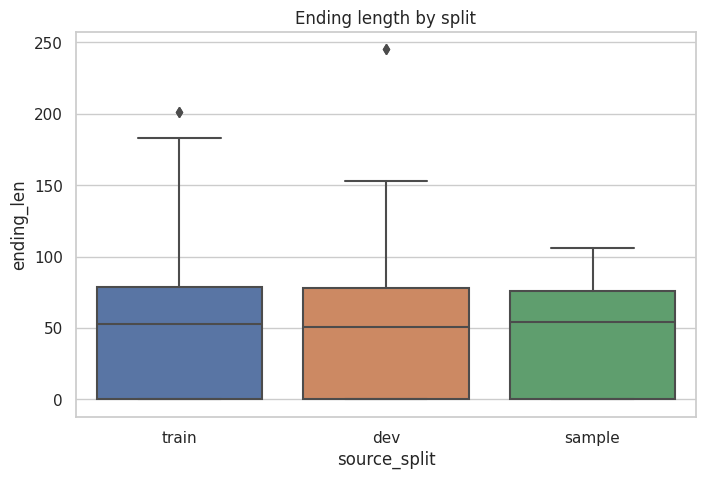

In [9]:
# 9. Split comparison: text length by split

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="source_split", y="sentence_len")
plt.title("Sentence length by split")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="source_split", y="precontext_len")
plt.title("Precontext length by split")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="source_split", y="ending_len")
plt.title("Ending length by split")
plt.show()


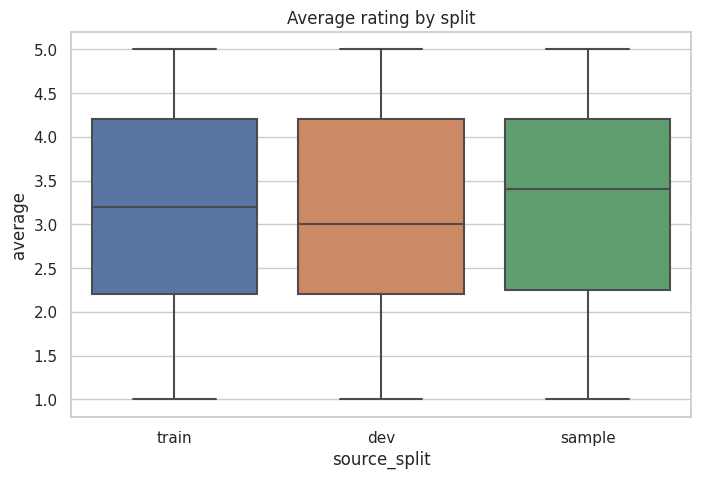

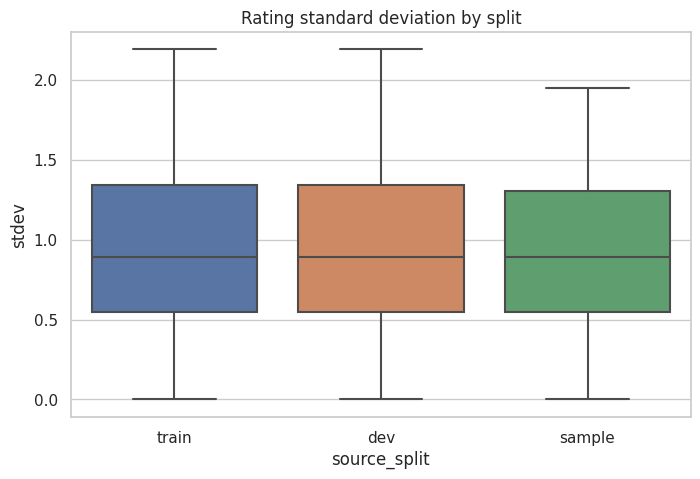

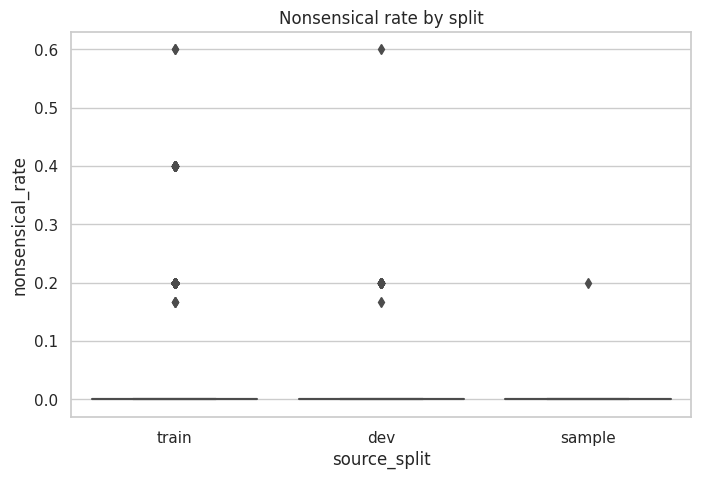

In [10]:
# 10. Split comparison: rating features by split

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="source_split", y="average")
plt.title("Average rating by split")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="source_split", y="stdev")
plt.title("Rating standard deviation by split")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="source_split", y="nonsensical_rate")
plt.title("Nonsensical rate by split")
plt.show()


In [13]:
# 11. Statistical tests: Mann–Whitney and ANOVA between splits

def split_series(feature):
    train = df.loc[df["source_split"] == "train", feature].dropna()
    dev = df.loc[df["source_split"] == "dev", feature].dropna()
    sample = df.loc[df["source_split"] == "sample", feature].dropna()
    return train, dev, sample

features_to_test = ["sentence_len", "average", "stdev", "nonsensical_rate"]

for feat in features_to_test:
    print("\nFeature:", feat)
    train, dev, sample = split_series(feat)

    # Mann–Whitney U: train vs dev
    if len(train) > 0 and len(dev) > 0:
        u_stat, p_val = mannwhitneyu(train, dev, alternative="two-sided")
        print("Mann–Whitney U (train vs dev): U=%.3f, p=%.5f" % (u_stat, p_val))

    # ANOVA: train vs dev vs sample
    groups = [g for g in [train, dev, sample] if len(g) > 0]
    if len(groups) > 1:
        f_stat, p_anova = f_oneway(*groups)
        print("ANOVA: F=%.3f, p=%.5f" % (f_stat, p_anova))



Feature: sentence_len
Mann–Whitney U (train vs dev): U=710334.000, p=0.02539
ANOVA: F=5.069, p=0.00635

Feature: average
Mann–Whitney U (train vs dev): U=676783.000, p=0.71781
ANOVA: F=0.299, p=0.74194

Feature: stdev
Mann–Whitney U (train vs dev): U=670760.500, p=0.98033
ANOVA: F=0.036, p=0.96502

Feature: nonsensical_rate
Mann–Whitney U (train vs dev): U=690445.500, p=0.02660
ANOVA: F=4.058, p=0.01739


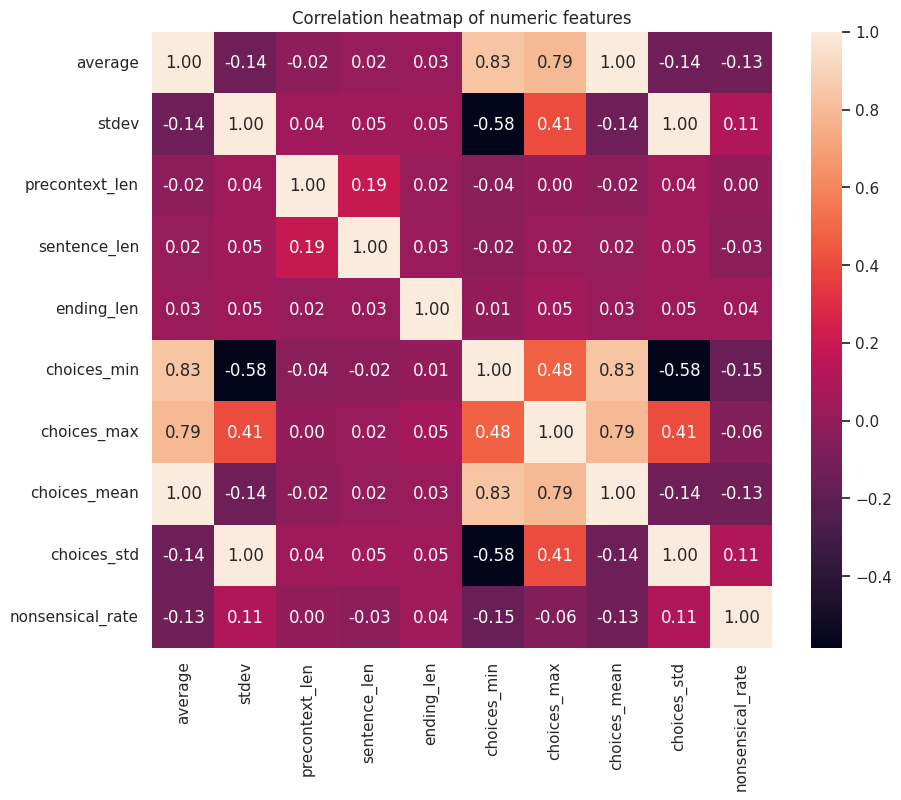

In [14]:
# 12. Correlation analysis

corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation heatmap of numeric features")
plt.show()


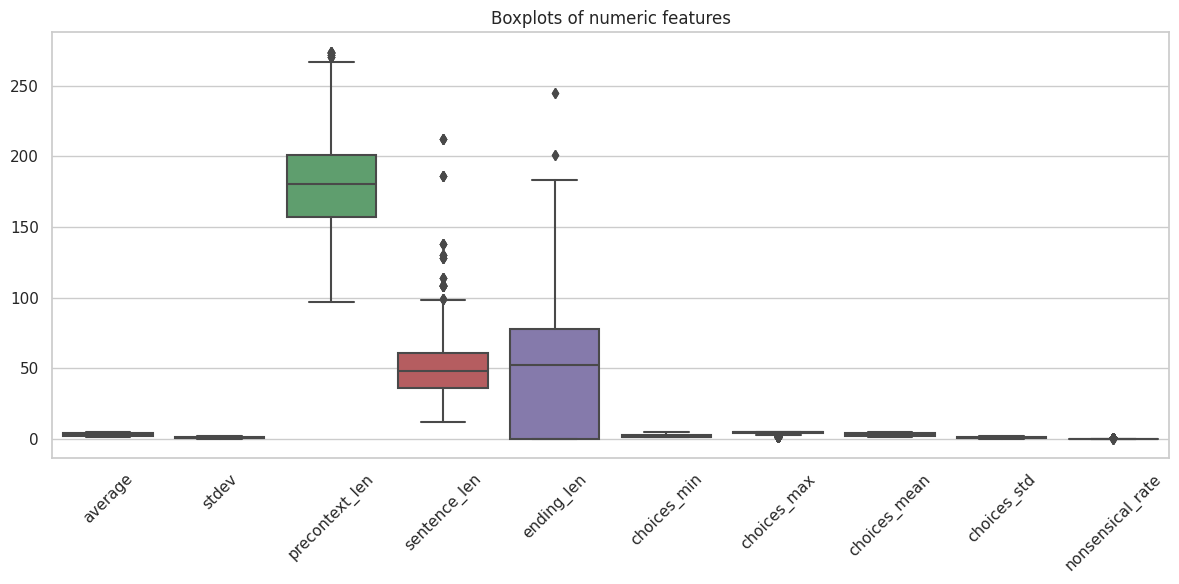

In [15]:
# 13. Outlier inspection: boxplots for numeric features

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of numeric features")
plt.tight_layout()
plt.show()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import numpy as np

docs = [
    "I love this movie, it is great and fun",
    "This film is awful, boring and terrible",
    "Amazing acting and great story",
    "Horrible plot and bad acting"
]
y = np.array([1, 0, 1, 0])  # 1 = positive, 0 = negative

vec = CountVectorizer()
X = vec.fit_transform(docs)

# Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X, y)

# Multinomial Logistic Regression (softmax)
logreg = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    max_iter=1000
)
logreg.fit(X, y)

test_docs = [
    "great movie with amazing story",
    "boring and awful film"
]
X_test = vec.transform(test_docs)

print("NB probabilities:", nb.predict_proba(X_test))
print("LogReg probabilities:", logreg.predict_proba(X_test))

NB probabilities: [[0.04535173 0.95464827]
 [0.90119744 0.09880256]]
LogReg probabilities: [[0.24315949 0.75684051]
 [0.70934829 0.29065171]]


In [1]:
import numpy as np

# Likelihood table from the exercise
P_pos = {
    "I": 0.09,
    "always": 0.07,
    "like": 0.29,
    "foreign": 0.04,
    "films": 0.08
}

P_neg = {
    "I": 0.16,
    "always": 0.06,
    "like": 0.06,
    "foreign": 0.15,
    "films": 0.11
}

sentence = ["I", "always", "like", "foreign", "films"]

# Compute Naive Bayes scores by multiplying likelihoods
score_pos = np.prod([P_pos[word] for word in sentence])
score_neg = np.prod([P_neg[word] for word in sentence])

print("Score POS:", score_pos)
print("Score NEG:", score_neg)

assigned_class = "positive" if score_pos > score_neg else "negative"
print("\nNaive Bayes classification:", assigned_class)

Score POS: 5.8464e-06
Score NEG: 9.503999999999999e-06

Naive Bayes classification: negative


In [2]:
import numpy as np

# Given likelihoods from Exercise B.1
P_pos = {
    "I": 0.09,
    "always": 0.07,
    "like": 0.29,
    "foreign": 0.04,
    "films": 0.08
}

P_neg = {
    "I": 0.16,
    "always": 0.06,
    "like": 0.06,
    "foreign": 0.15,
    "films": 0.11
}

sentence = ["I", "always", "like", "foreign", "films"]

# Equal priors (as in the exercise)
P_pos_prior = 0.5
P_neg_prior = 0.5

# Compute NB scores by simple multiplication (or logs)
score_pos = P_pos_prior * np.prod([P_pos[w] for w in sentence])
score_neg = P_neg_prior * np.prod([P_neg[w] for w in sentence])

print("Score POS:", score_pos)
print("Score NEG:", score_neg)

assigned_class = "positive" if score_pos > score_neg else "negative"
print("\nNaive Bayes predicted class:", assigned_class)

Score POS: 2.9232e-06
Score NEG: 4.7519999999999996e-06

Naive Bayes predicted class: negative
